In [1]:
import glob
import numpy as np
import cv2
from PIL import Image
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

filelist = glob.glob("./PictureStackImages/*.JPG")
filelist

['./PictureStackImages/8.JPG',
 './PictureStackImages/12.JPG',
 './PictureStackImages/5.JPG']

In [2]:
g = [1.79526731311, 1.85695064051, 1.69743757856]

In [3]:
def shutter_speed(filelist):
    speed_arr = []
    for file in filelist:
        exif_data = Image.open(file)._getexif()
        speed = float(10/exif_data[33434][1])
        speed_arr.append(speed)
    return speed_arr
speed_arr = shutter_speed(filelist)
log_speed = np.log(speed_arr)

a1 = float(speed_arr[0]/speed_arr[2])
a2 = float(speed_arr[1]/speed_arr[2])

In [14]:
im1 = cv2.imread(filelist[2])
im2 = cv2.imread(filelist[0])
im3 = cv2.imread(filelist[1])
img_list = [cv2.imread(file) for file in filelist]

In [5]:
# width = 3264
# length = 4928

# wi_start = int((width - 500)/2)
# len_start = int((length - 500)/2)

# im1 = im11[wi_start:wi_start + 500, len_start:len_start + 500, :]
# im2 = im21[wi_start:wi_start + 500, len_start:len_start + 500, :]
# im3 = im31[wi_start:wi_start + 500, len_start:len_start + 500, :]

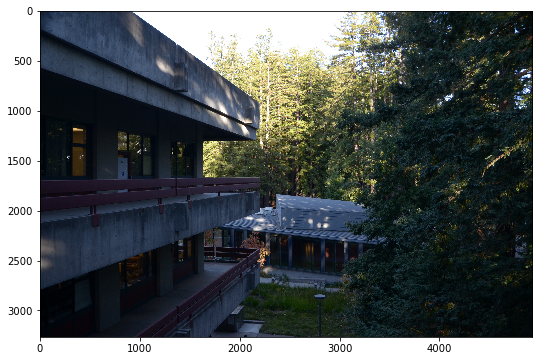

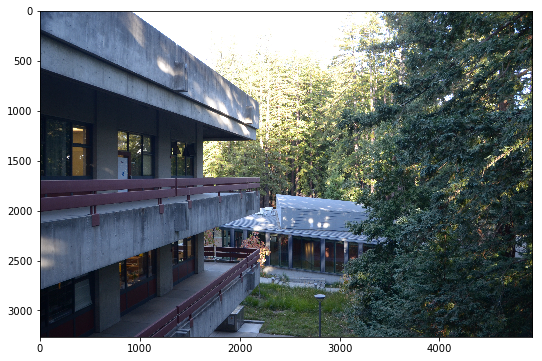

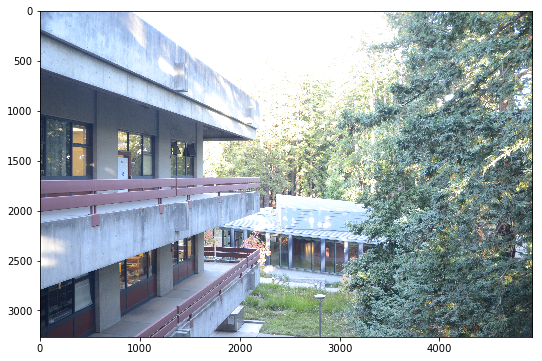

In [6]:
plt.figure(figsize=(12,6)); plt.imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)); plt.show()
plt.figure(figsize=(12,6)); plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)); plt.show()
plt.figure(figsize=(12,6)); plt.imshow(cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)); plt.show()

In [7]:
im1b = np.zeros(im1.shape, np.float32)
im2b = np.zeros(im1.shape, np.float32)
im3b = np.zeros(im1.shape, np.float32)

for i in range(3):
    im1b[:,:,i] = np.power(im1[:,:,i],g[i])
    im2b[:,:,i] = np.power(im2[:,:,i],g[i])
    im3b[:,:,i] = np.power(im3[:,:,i],g[i])

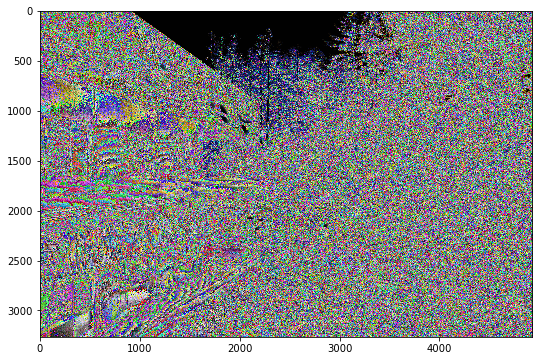

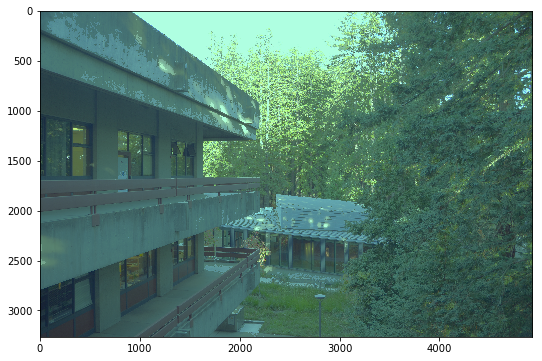

True

In [8]:
hdr_im1 = np.zeros(im1.shape, np.float32)
hdr_im1b = np.zeros(im1.shape, np.float32)
for i in range(im1.shape[0]):
    for j in range(im1.shape[1]):
        if im3[i,j,0] < 255 and im3[i,j,1] < 255 and im3[i,j,2] < 255:
            hdr_im1[i,j,:] = im3[i,j,:]/a2
            hdr_im1b[i,j,:] = im3b[i,j,:]/a2
        elif im2[i,j,0] < 255 and im2[i,j,1] < 255 and im2[i,j,2] < 255:
            hdr_im1[i,j,:] = im2[i,j,:]/a1
            hdr_im1b[i,j,:] = im2b[i,j,:]/a1  
        else:
            hdr_im1[i,j,:] = im1[i,j,:]
            hdr_im1b[i,j,:] = im1b[i,j,:]  
            
# plt.figure(figsize=(12,6)); plt.imshow(cv2.cvtColor(hdr_im1, cv2.COLOR_BGR2RGB)); plt.show() 

tonemap1 = cv2.createTonemapDurand(gamma=2.2)
res_debvec = tonemap1.process(hdr_im1b.copy())
res_debvec_8bit = np.clip(res_debvec*255, 0, 255).astype('uint8')
plt.figure(figsize=(12,6)); plt.imshow(cv2.cvtColor(res_debvec_8bit, cv2.COLOR_BGR2RGB)); plt.show() 
cv2.imwrite("./TonemappedImages/hdr1_debve.jpg", res_debvec_8bit)

merge_mertens = cv2.createMergeMertens()
res_mertens = merge_mertens.process(img_list)
res_mertens_8bit = np.clip(res_mertens*255, 0, 255).astype('uint8')
plt.figure(figsize=(12,6)); plt.imshow(cv2.cvtColor(res_debvec_8bit, cv2.COLOR_BGR2RGB)); plt.show() 
cv2.imwrite("./TonemappedImages/hdr1_fusion_mertens.jpg", res_mertens_8bit)


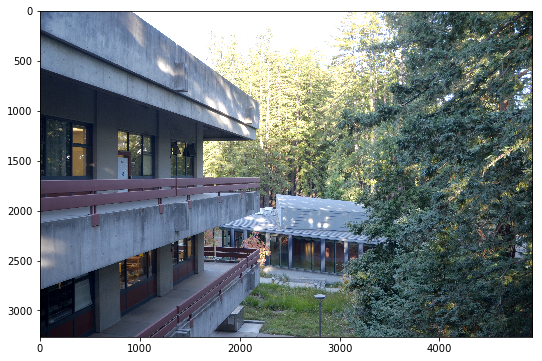

True

In [15]:
merge_mertens = cv2.createMergeMertens()
res_mertens = merge_mertens.process(img_list)
res_mertens_8bit = np.clip(res_mertens*255, 0, 255).astype('uint8')
plt.figure(figsize=(12,6)); plt.imshow(cv2.cvtColor(res_mertens_8bit, cv2.COLOR_BGR2RGB)); plt.show() 
cv2.imwrite("./TonemappedImages/hdr1_fusion_mertens.jpg", res_mertens_8bit)

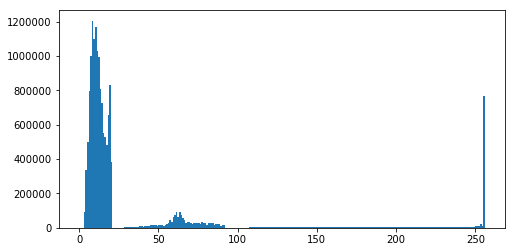

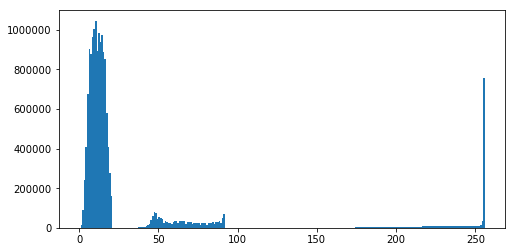

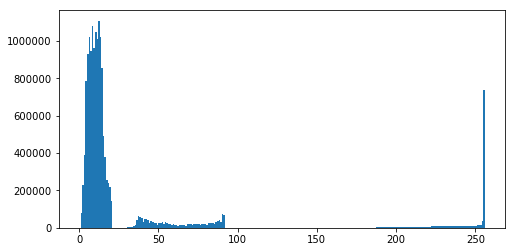

In [11]:
plt.figure(figsize=(8,4)); plt.hist(res_debvec_8bit[:,:,0].ravel(),256,[0,256]); plt.show()
plt.figure(figsize=(8,4)); plt.hist(res_debvec_8bit[:,:,1].ravel(),256,[0,256]); plt.show()
plt.figure(figsize=(8,4)); plt.hist(res_debvec_8bit[:,:,2].ravel(),256,[0,256]); plt.show()